In [115]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [116]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Future sales prediction/sales_train.csv')
df_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [117]:
df_train.shape

(2935849, 6)

In [118]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Future sales prediction/test.csv')
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [119]:
df_test.shape

(214200, 3)

In [120]:
items=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Future sales prediction/items.csv')
items.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [121]:
item_categories=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Future sales prediction/item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


**EDA with training data**

In [122]:
df_train['date']=pd.to_datetime(df_train['date'],dayfirst=True)

In [123]:
df_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0


In [124]:
# totals items per day of different shops

df_train.groupby(['date','shop_id'])[['item_cnt_day']].sum()

item_cnt_day
date       shop_id              
2013-01-01 2                24.0
           7                89.0
           8                50.0
           13               31.0
           14               66.0
...                          ...
2015-10-31 55              137.0
           56               67.0
           57              121.0
           58               82.0
           59               56.0

[47228 rows x 1 columns]

In [125]:
# Merging all the different columns 

df_item=pd.merge(df_train,items,on='item_id')
df_final=pd.merge(df_item,item_categories,on='item_category_id')

In [126]:
df_final=df_final.reset_index()

In [127]:
df_final.head(3)

,index,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,1,2013-01-23,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2,2013-01-20,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [128]:
df_final.isnull().sum()

index                 0
date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64

**Visualizations**

In [129]:
df_visu=df_final.set_index('date')

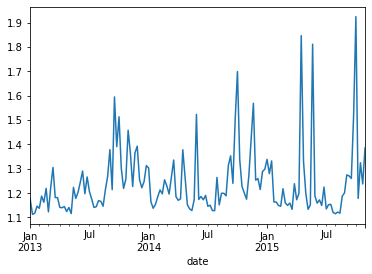

In [130]:
df_visu.item_cnt_day.resample('W').mean().plot()

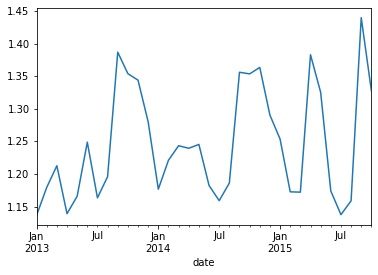

In [131]:
df_visu.item_cnt_day.resample('M').mean().plot()

**Converting the data to monthly basis and creating a pivot table**

In [132]:
df_month=df_final['date'].dt.month
df_year=df_final['date'].dt.year
df_final['date']=df_month.astype(str)+'/'+df_year.astype(str)
df_final

,index,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,0,1/2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,1,1/2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2,1/2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,3,1/2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,4,1/2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935844,2935844,10/2015,33,55,13093,250.0,1.0,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра)
2935845,2935845,9/2015,32,55,13091,1000.0,1.0,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935846,2935846,9/2015,32,55,13094,2500.0,1.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935847,2935847,9/2015,32,55,13094,2500.0,2.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)


In [133]:
df_grouped=df_final.groupby(['date','shop_id','item_id']).sum()


In [134]:
#Creating a pivot table with shopid as index and date as columns with item per day as values

df=df_grouped.pivot_table(index=['shop_id','item_id'],columns='date',values='item_cnt_day')
df=df.fillna(0)

In [135]:
df.reset_index(inplace=True)

In [136]:
df

date,shop_id,item_id,1/2013,1/2014,1/2015,10/2013,10/2014,10/2015,11/2013,11/2014,12/2013,12/2014,2/2013,2/2014,2/2015,3/2013,3/2014,3/2015,4/2013,4/2014,4/2015,5/2013,5/2014,5/2015,6/2013,6/2014,6/2015,7/2013,7/2014,7/2015,8/2013,8/2014,8/2015,9/2013,9/2014,9/2015
0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,59,22155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,59,22162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
424122,59,22164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Creating X_test for kaggle prediction**

In [137]:
X_test=pd.merge(df,df_test,on=['shop_id','item_id'],how='right')

In [138]:
X_test.shape

(214200, 37)

In [139]:
X_test.isnull().sum()

shop_id         0
item_id         0
1/2013     102796
1/2014     102796
1/2015     102796
10/2013    102796
10/2014    102796
10/2015    102796
11/2013    102796
11/2014    102796
12/2013    102796
12/2014    102796
2/2013     102796
2/2014     102796
2/2015     102796
3/2013     102796
3/2014     102796
3/2015     102796
4/2013     102796
4/2014     102796
4/2015     102796
5/2013     102796
5/2014     102796
5/2015     102796
6/2013     102796
6/2014     102796
6/2015     102796
7/2013     102796
7/2014     102796
7/2015     102796
8/2013     102796
8/2014     102796
8/2015     102796
9/2013     102796
9/2014     102796
9/2015     102796
ID              0
dtype: int64

In [140]:
X_test=X_test.fillna(0)

In [141]:
X_test

,shop_id,item_id,1/2013,1/2014,1/2015,10/2013,10/2014,10/2015,11/2013,11/2014,12/2013,12/2014,2/2013,2/2014,2/2015,3/2013,3/2014,3/2015,4/2013,4/2014,4/2015,5/2013,5/2014,5/2015,6/2013,6/2014,6/2015,7/2013,7/2014,7/2015,8/2013,8/2014,8/2015,9/2013,9/2014,9/2015,ID
0,5,5037,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5,5233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214195
214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214196
214197,45,15757,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214197
214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214198


In [142]:
X_test_new=X_test.drop(columns=['ID','1/2013','shop_id','item_id'])

In [143]:
X_test_new.shape

(214200, 33)

In [144]:
X_test_new

,1/2014,1/2015,10/2013,10/2014,10/2015,11/2013,11/2014,12/2013,12/2014,2/2013,2/2014,2/2015,3/2013,3/2014,3/2015,4/2013,4/2014,4/2015,5/2013,5/2014,5/2015,6/2013,6/2014,6/2015,7/2013,7/2014,7/2015,8/2013,8/2014,8/2015,9/2013,9/2014,9/2015
0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Train test split**

In [153]:
X=df.drop(columns=['10/2015','shop_id','item_id'])
y=df['10/2015'].values.reshape(-1,1)

In [154]:
print(X.shape)
print(y.shape)

(424124, 33)
(424124, 1)


In [155]:
scaled=StandardScaler()
X_train_scaled=scaled.fit_transform(X)
y_scaled=scaled.fit_transform(y)
X_test_scaled=scaled.fit_transform(X_test_new)

**ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [159]:
#Training a ANN model

model=keras.Sequential()
model.add(keras.layers.Dense(units=200,activation='relu',input_dim=33))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mean_squared_error')
callback=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               6800      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 27,001
Trainable params: 27,001
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.fit(x=X_train_scaled,y=y_scaled,epochs=30,callbacks=[callback])

Epoch 1/30
13254/13254 [==============================] - 22s 2ms/step - loss: 0.3817 - mse: 0.3817
Epoch 2/30
13254/13254 [==============================] - 22s 2ms/step - loss: 1.1204 - mse: 1.1204
Epoch 3/30
13254/13254 [==============================] - 22s 2ms/step - loss: 1.9638 - mse: 1.9638
Epoch 4/30
13254/13254 [==============================] - 22s 2ms/step - loss: 1.3718 - mse: 1.3718
Epoch 5/30
13254/13254 [==============================] - 22s 2ms/step - loss: 0.5590 - mse: 0.5590
Epoch 6/30
13254/13254 [==============================] - 22s 2ms/step - loss: 0.7156 - mse: 0.7156
Epoch 7/30
13254/13254 [==============================] - 21s 2ms/step - loss: 0.5352 - mse: 0.5352
Epoch 8/30
13254/13254 [==============================] - 22s 2ms/step - loss: 0.7145 - mse: 0.7145
Epoch 9/30
13254/13254 [==============================] - 22s 2ms/step - loss: 4.1863 - mse: 4.1863
Epoch 10/30
13254/13254 [==============================] - 22s 2ms/step - loss: 1.1183 - mse: 1.1183

In [174]:
predictions=model.predict(X_test_scaled).round(1)

In [175]:
item=pd.DataFrame(predictions,columns=['item_cnt_month'])

In [176]:
data={
    'item_cnt_month':item['item_cnt_month']
}
df_sub=pd.DataFrame(data=data,index=X_test['ID'])
df_sub

,item_cnt_month
ID,
0,0.1
1,0.0
2,0.3
3,0.0
4,0.0
...,...
214195,0.0
214196,0.0
214197,0.0


In [177]:
df_sub.to_csv('sample_sub_final.csv')